# CO₂ and Greenhouse Gas Emissions Analysis

This notebook analyzes the **Our World in Data CO₂ and Greenhouse Gas Emissions** dataset. It includes key metrics such as annual CO₂ emissions, CO₂ emissions per capita, cumulative and consumption-based CO₂ emissions, along with other indicators related to greenhouse gas emissions and energy mix.

A codebook (`owid-co2-codebook.csv`) is provided alongside the dataset (`owid-co2-data.csv`). The codebook includes detailed descriptions and source information for each indicator. We'll use it to gain a better understanding of the dataset.

## Objectives
1. **Load and Inspect the Data:**  
   - Load both the main dataset and codebook.
   - Review basic data shapes and contents.
2. **Summarize the Data:**  
   - Generate summary statistics.
   - Check for missing values.
3. **Visual Exploration:**  
   - Visualize the distribution of annual CO₂ emissions.
   - Examine trends over time.
   - Explore relationships (e.g., via correlation) between indicators.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure that plots are displayed in the notebook
%matplotlib inline

# Load the datasets
data = pd.read_csv('owid-co2-data.csv')
codebook = pd.read_csv('owid-co2-codebook.csv')

# Display the first few rows of the dataset and codebook
print("=== Data Sample ===")
print(data.head())

print("\n=== Codebook Sample ===")
print(codebook.head())


=== Data Sample ===
       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                     

# Step 2: Data Exploration and Preliminary Cleaning

After loading our dataset and codebook, our next move is to understand its structure and content.
We'll start by:
- Using the `.info()` method to see the data types and non-null counts.
- Using `.describe()` to obtain summary statistics for numerical columns.
- Counting the number of missing values in each column.


In [3]:
# Display basic information about the dataset
print("=== Data Information ===")
data_info = data.info()
# The .info() output is printed directly; no need to capture its output into a variable.

# Display summary statistics for numerical columns
print("\n=== Summary Statistics ===")
print(data.describe())

# Count missing values in each column
print("\n=== Missing Values per Column ===")
print(data.isnull().sum())


=== Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 1

# Step 3: Data Cleaning and Preprocessing

In this step we will:
- Compute the percentage of missing values for each column.
- Identify and drop columns that have more than 60% missing values.
- Remove rows that are missing crucial data (i.e., 'country', 'year', or 'co2').

This cleaning process will help us to ensure that the subsequent analysis—such as visualizing trends and performing statistical tests—is based on reliable data.


In [4]:
# Step 3: Data Cleaning and Preprocessing

# Calculate missing percentage for each column
missing_pct = data.isnull().mean() * 100
missing_df = missing_pct.sort_values(ascending=False).to_frame(name='missing_pct')
print("=== Missing Percentage per Column ===")
print(missing_df)

# Define a threshold for dropping columns (e.g., columns with more than 60% missing values)
threshold = 60.0
columns_to_drop = missing_df[missing_df['missing_pct'] > threshold].index.tolist()
print("\nColumns to drop (>{} % missing):".format(threshold))
print(columns_to_drop)

# Create a cleaned copy of the data by dropping these columns
data_clean = data.drop(columns=columns_to_drop)
print("\nData shape after dropping columns:", data_clean.shape)

# For our analysis, we require that 'country', 'year', and 'co2' have non-null values.
data_clean = data_clean.dropna(subset=['country', 'year', 'co2'])
print("Data shape after dropping rows with missing 'country', 'year', or 'co2':", data_clean.shape)

# Optionally, display basic information of the cleaned dataset
print("\n=== Cleaned Data Information ===")
data_clean.info()


=== Missing Percentage per Column ===
                                   missing_pct
share_global_cumulative_other_co2    95.800044
share_global_other_co2               95.800044
other_co2_per_capita                 95.070829
other_industry_co2                   93.620370
cumulative_other_co2                 93.620370
...                                        ...
temperature_change_from_ghg          18.310056
population                           18.274193
iso_code                             15.797653
year                                  0.000000
country                               0.000000

[79 rows x 1 columns]

Columns to drop (>60.0 % missing):
['share_global_cumulative_other_co2', 'share_global_other_co2', 'other_co2_per_capita', 'other_industry_co2', 'cumulative_other_co2', 'consumption_co2_per_gdp', 'consumption_co2_per_capita', 'trade_co2', 'trade_co2_share', 'consumption_co2', 'energy_per_gdp', 'co2_including_luc_per_unit_energy', 'energy_per_capita', 'primary_energy_consu

# Step 4: Exploratory Data Analysis

## Global Emissions Trends

Here, we group the data by year to observe:
- **Total CO₂ Emissions:** The aggregated sum of CO₂ emissions across all countries per year.
- **Average CO₂ Emissions Per Capita:** The yearly average of per capita CO₂ emissions.

These trends will help us understand the overall direction of emissions over time.


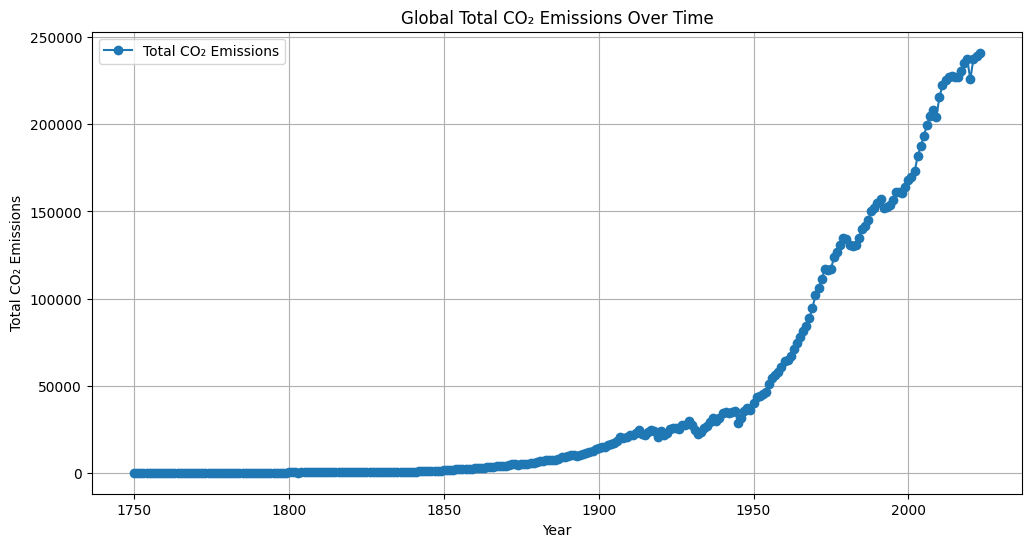

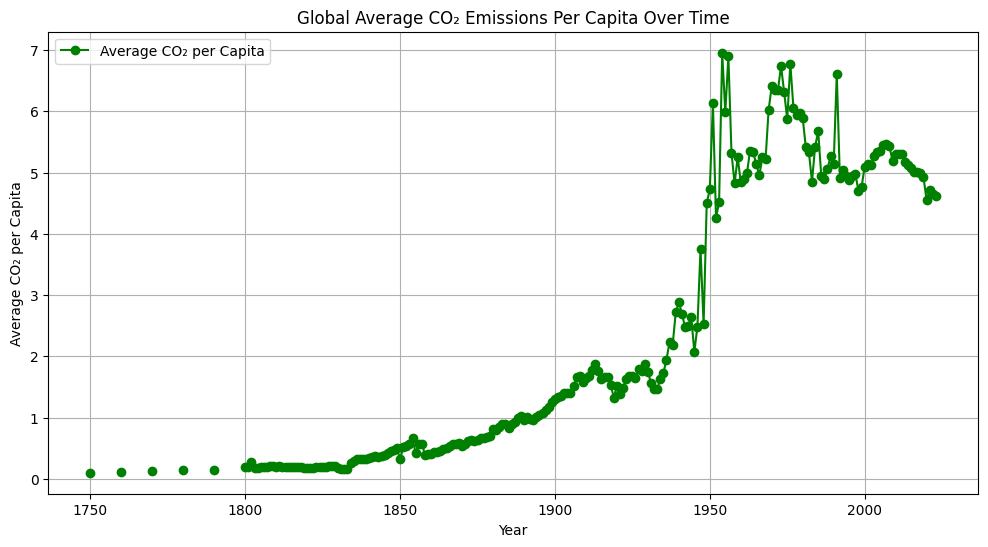

In [5]:
# Step 4.1: Global Emissions Trends

# Aggregate data by year: total CO2 and average CO2 per capita.
grouped_year = data_clean.groupby('year').agg({
    'co2': 'sum', 
    'co2_per_capita': 'mean',
    'population': 'sum'
}).reset_index()

# Plot total global CO2 emissions over time.
plt.figure(figsize=(12, 6))
plt.plot(grouped_year['year'], grouped_year['co2'], marker='o', linestyle='-', label='Total CO₂ Emissions')
plt.title("Global Total CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions")
plt.legend()
plt.grid(True)
plt.show()

# Plot global average CO2 emissions per capita over time.
plt.figure(figsize=(12, 6))
plt.plot(grouped_year['year'], grouped_year['co2_per_capita'], marker='o', color='green', linestyle='-', label='Average CO₂ per Capita')
plt.title("Global Average CO₂ Emissions Per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("Average CO₂ per Capita")
plt.legend()
plt.grid(True)
plt.show()


## Correlation Analysis of Emission Indicators

Next, we examine relationships among several key emission indicators. We select a subset of variables:
- **CO₂ emissions (co2)**
- **Cement CO₂ emissions (cement_co2)**
- **Coal CO₂ emissions (coal_co2)**
- **Oil CO₂ emissions (oil_co2)**
- **Methane emissions (methane)**
- **Nitrous oxide emissions (nitrous_oxide)**

We'll compute a Pearson correlation matrix and visualize it with a heatmap. This analysis may reveal how changes in one type of emission correlate with others.


=== Correlation Matrix ===
                    co2  cement_co2  coal_co2   oil_co2   methane  \
co2            1.000000    0.886177  0.957950  0.968079  0.922544   
cement_co2     0.886177    1.000000  0.906799  0.785878  0.815637   
coal_co2       0.957950    0.906799  1.000000  0.865458  0.913947   
oil_co2        0.968079    0.785878  0.865458  1.000000  0.885816   
methane        0.922544    0.815637  0.913947  0.885816  1.000000   
nitrous_oxide  0.951821    0.823060  0.915235  0.937750  0.980442   

               nitrous_oxide  
co2                 0.951821  
cement_co2          0.823060  
coal_co2            0.915235  
oil_co2             0.937750  
methane             0.980442  
nitrous_oxide       1.000000  


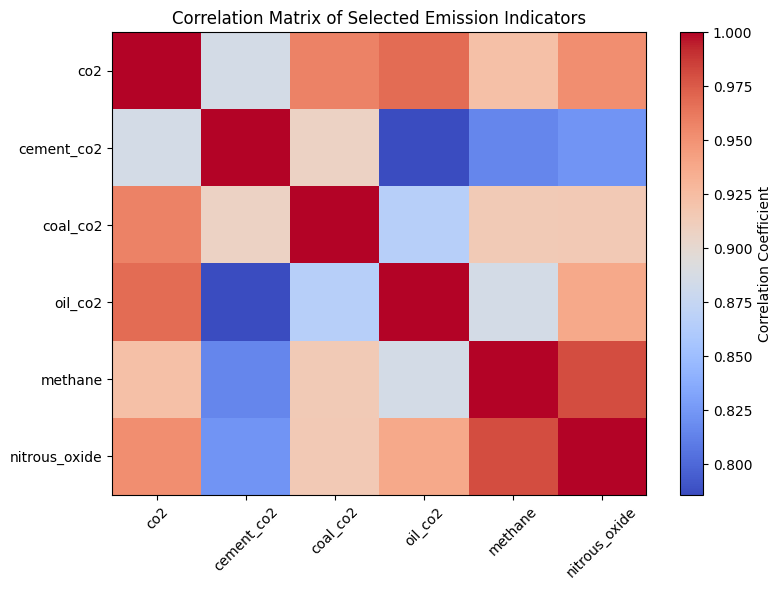

In [6]:
# Step 4.2: Correlation Analysis among Selected Emission Indicators

# Select key columns for the correlation analysis.
columns_for_corr = ['co2', 'cement_co2', 'coal_co2', 'oil_co2', 'methane', 'nitrous_oxide']

# Drop rows with missing values in these selected columns to ensure accurate correlations.
corr_data = data_clean[columns_for_corr].dropna()

# Compute the correlation matrix.
corr_matrix = corr_data.corr()

# Display the correlation matrix as text.
print("=== Correlation Matrix ===")
print(corr_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(columns_for_corr)), columns_for_corr, rotation=45)
plt.yticks(range(len(columns_for_corr)), columns_for_corr)
plt.title("Correlation Matrix of Selected Emission Indicators")
plt.tight_layout()
plt.show()


# Country-Level Analysis

**Indicators**: Total CO₂ emissions (co2) and CO₂ emissions per capita (co2_per_capita) over time for each country.

**Objective**: Identify the top 10 emitting countries in the most recent year of data and analyze how their total and per capita CO₂ emissions have evolved over time. This helps in understanding both the overall scale of emissions and the individual impact relative to population.

**Approach**: First, the data is filtered to include only the most recent year to identify the top 10 countries by total CO₂ emissions. Then, the dataset is further filtered to include only these top emitters. Two line plots are created: one showing the trend of total CO₂ emissions over time for each of the top emitters, and another showing their emissions per capita over time. These visualizations provide insights into how emission patterns have shifted both in aggregate and on a per-person basis, highlighting differences in national responsibilities and behaviors. 

This includes two plots:
- **Total CO₂ Emissions** over time.
- **CO₂ Emissions Per Capita** over time.


Top emitters in 2023: ['World' 'Non-OECD (GCP)' 'Asia' 'Asia (GCP)'
 'Upper-middle-income countries' 'High-income countries' 'China'
 'OECD (GCP)' 'Asia (excl. China and India)' 'North America']


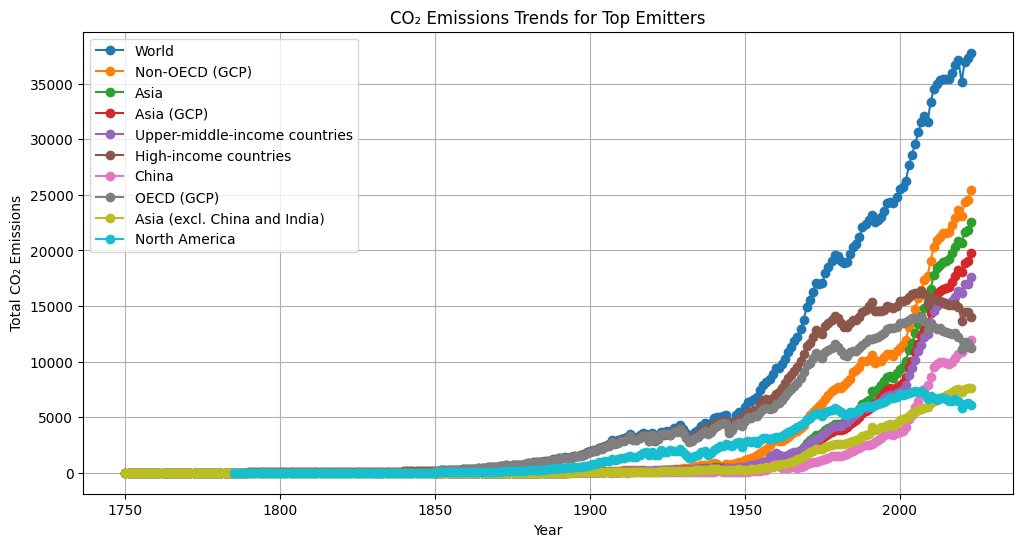

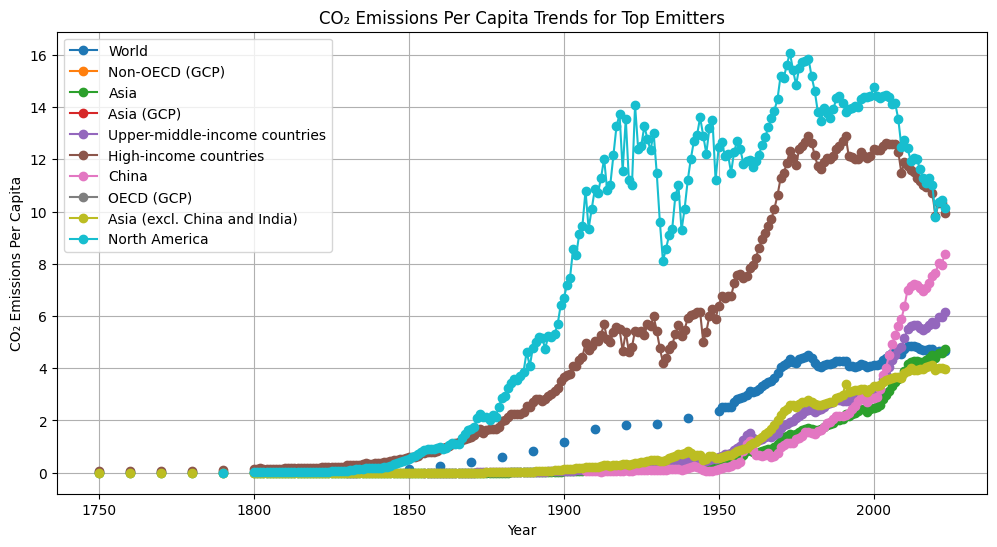

In [7]:
# Identify the latest year in the dataset.
latest_year = data_clean['year'].max()
latest_data = data_clean[data_clean['year'] == latest_year]

# Get top 10 emitters by total CO2 emissions in the latest year.
top_emitters = latest_data.sort_values(by='co2', ascending=False)['country'].unique()[:10]
print("Top emitters in {}:".format(latest_year), top_emitters)

# Filter the data for these top emitters.
data_top_emitters = data_clean[data_clean['country'].isin(top_emitters)]

# Plot total CO2 emissions over time for the top emitters.
plt.figure(figsize=(12, 6))
for country in top_emitters:
    df_country = data_top_emitters[data_top_emitters['country'] == country]
    plt.plot(df_country['year'], df_country['co2'], marker='o', label=country)
plt.title("CO₂ Emissions Trends for Top Emitters")
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions")
plt.legend()
plt.grid(True)
plt.show()

# Plot CO2 emissions per capita over time for the top emitters.
plt.figure(figsize=(12, 6))
for country in top_emitters:
    df_country = data_top_emitters[data_top_emitters['country'] == country]
    plt.plot(df_country['year'], df_country['co2_per_capita'], marker='o', label=country)
plt.title("CO₂ Emissions Per Capita Trends for Top Emitters")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions Per Capita")
plt.legend()
plt.grid(True)
plt.show()


The visualizations reveal striking contrasts between regions in both total and per capita CO₂ emissions. In the first plot showing total emissions over time, China exhibits a steep upward trajectory, overtaking high-income countries after the early 2000s and becoming the largest overall emitter by 2023. In contrast, the second plot on per capita emissions shows that high-income regions, especially North America, have consistently maintained the highest emissions per person across the timeline. Despite China’s rapid growth in total emissions, its per capita values remain below those of wealthier nations. These trends highlight how population size, economic development, and consumption patterns shape emission dynamics—while China leads in total output, high-income countries continue to have a significantly larger carbon footprint per individual.

# Fuel-Specific (Sectoral) Deep Dives

**Indicators:** CO₂ emissions specifically from cement (`cement_co2`), coal (`coal_co2`), and oil (`oil_co2`) usage over time, aggregated at the global level.  

**Objective:** Explore how emissions from different fuel sources have evolved globally, shedding light on changing patterns in industrial activities and energy consumption. This comparison helps to identify which sectors are becoming more or less prominent contributors to global CO₂ emissions.  

**Approach:** The dataset is grouped by year, summing the emissions from cement, coal, and oil across all countries to obtain global totals for each fuel source. These aggregated values are then visualized through a multi-line plot, allowing for direct comparison of trends in emissions from each fuel type over time. The resulting visualization highlights sectoral shifts, such as the growth or decline of particular fuel sources, and supports interpretation of broader energy transitions and policy impacts.

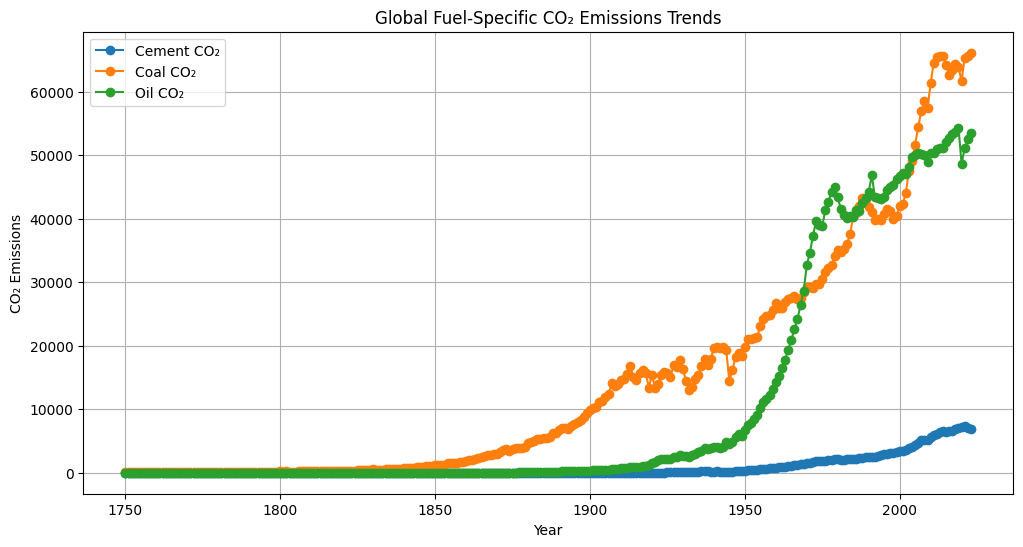

In [8]:
# Aggregate global fuel-specific emissions by year.
global_fuel = data_clean.groupby('year').agg({
    'cement_co2': 'sum',
    'coal_co2': 'sum',
    'oil_co2': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_fuel['year'], global_fuel['cement_co2'], marker='o', label='Cement CO₂')
plt.plot(global_fuel['year'], global_fuel['coal_co2'], marker='o', label='Coal CO₂')
plt.plot(global_fuel['year'], global_fuel['oil_co2'], marker='o', label='Oil CO₂')
plt.title("Global Fuel-Specific CO₂ Emissions Trends")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend()
plt.grid(True)
plt.show()


# Temperature Change & Greenhouse Gases Analysis

**Indicators:** This analysis focuses on average annual temperature change attributed to individual greenhouse gases — carbon dioxide (`temperature_change_from_co2`), methane (`temperature_change_from_ch4`), nitrous oxide (`temperature_change_from_n2o`), and overall greenhouse gases (`temperature_change_from_ghg`) — as well as total CO₂ emissions (`co2`).  

**Objective:** The goal is to assess the relative contributions of different greenhouse gases to global temperature rise over time and to evaluate the direct relationship between total CO₂ emissions and the temperature change driven specifically by CO₂.  

**Approach:** First, average temperature change contributions from each gas are computed for every year by aggregating country-level data, allowing for global-level visualization of how each gas has contributed to warming trends over time. This is visualized via a multi-line plot to highlight differences and overlaps in warming impacts across gases. Next, a scatter plot is created to directly compare total CO₂ emissions against temperature change from CO₂, aiming to visually assess the correlation between rising emissions and their associated warming effects.



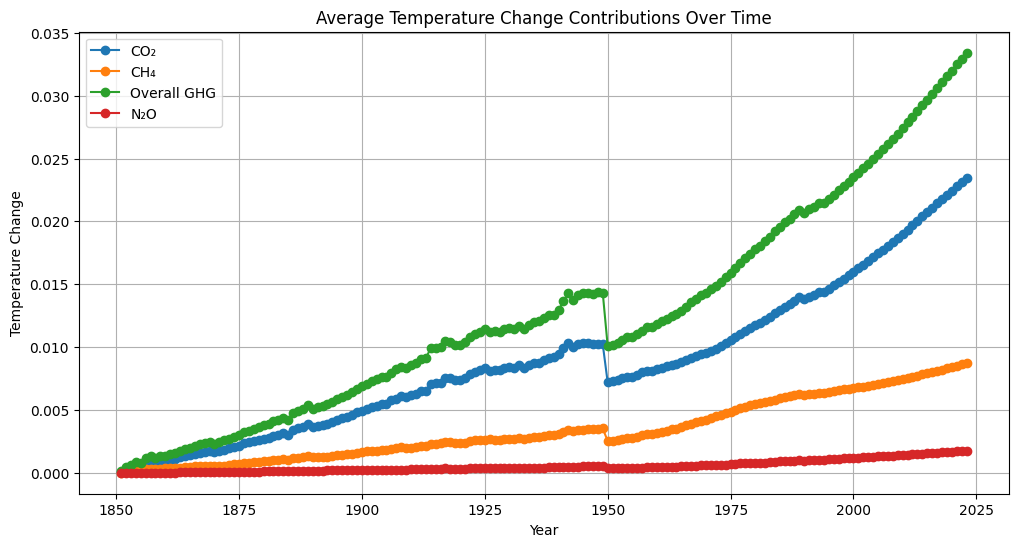

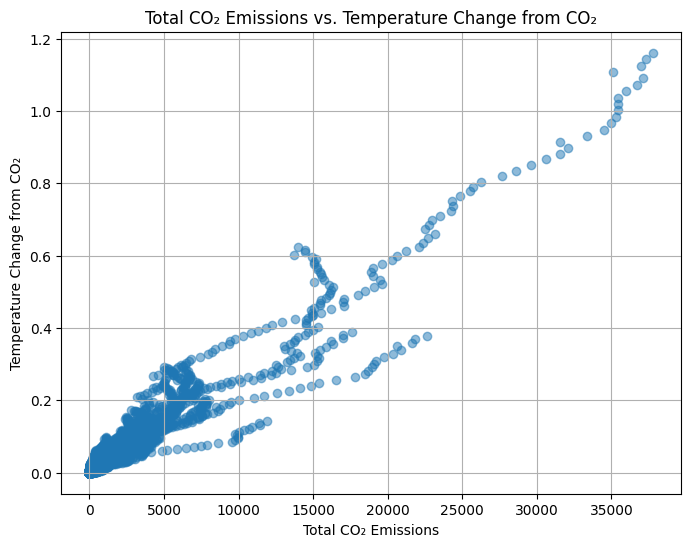

In [9]:
# Aggregate the average temperature change contributions by year.
temp_change = data_clean.groupby('year').agg({
    'temperature_change_from_co2': 'mean',
    'temperature_change_from_ch4': 'mean',
    'temperature_change_from_ghg': 'mean',
    'temperature_change_from_n2o': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(temp_change['year'], temp_change['temperature_change_from_co2'], marker='o', label='CO₂')
plt.plot(temp_change['year'], temp_change['temperature_change_from_ch4'], marker='o', label='CH₄')
plt.plot(temp_change['year'], temp_change['temperature_change_from_ghg'], marker='o', label='Overall GHG')
plt.plot(temp_change['year'], temp_change['temperature_change_from_n2o'], marker='o', label='N₂O')
plt.title("Average Temperature Change Contributions Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Change")
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot: Total CO₂ emissions vs. Temperature change from CO₂.
plt.figure(figsize=(8, 6))
plt.scatter(data_clean['co2'], data_clean['temperature_change_from_co2'], alpha=0.5)
plt.title("Total CO₂ Emissions vs. Temperature Change from CO₂")
plt.xlabel("Total CO₂ Emissions")
plt.ylabel("Temperature Change from CO₂")
plt.grid(True)
plt.show()


The visual analysis reveals that carbon dioxide (CO₂) is the primary contributor to global temperature change among the greenhouse gases, with its influence increasing steadily and sharply, especially after the 1950s—likely due to industrial expansion post-World War II. Methane (CH₄) and nitrous oxide (N₂O) also contribute to warming, but their impacts are significantly smaller, with CH₄ showing a gradual rise and N₂O remaining relatively stable until a slight increase in recent decades. The overall greenhouse gas (GHG) temperature change trend closely mirrors that of CO₂, confirming its dominant role. A strong positive correlation is evident between total CO₂ emissions and temperature change from CO₂, as shown in the scatter plot, where emissions and temperature rise together in a nonlinear, accelerating pattern. This suggests that as CO₂ emissions increase, their warming effect intensifies disproportionately. The clustering of data points also indicates common emission behaviors, while some outliers may reflect country-specific variations or abrupt industrial changes. Overall, the data underscores the urgent need to reduce CO₂ emissions to mitigate their escalating impact on global temperatures.

# Interactive Visualizations

**Indicators:** This dashboard focuses on country-level trends of total CO₂ emissions and CO₂ emissions per capita (`co2_per_capita`) over time.  

**Objective:** The purpose is to enable an intuitive and dynamic exploration of how emissions profiles have changed for individual countries, helping users better understand national-level emission patterns and their evolution over time.  

**Approach:** An interactive dashboard is implemented using a dropdown menu to allow users to select a country of interest. Upon selection, two line plots are displayed: one showing total CO₂ emissions across years, and another showing CO₂ emissions per capita. This facilitates a side-by-side analysis of both absolute and population-adjusted emission trends, offering deeper insight into national contributions and trajectories in global climate impact.

In [10]:
import ipywidgets as widgets
from IPython.display import display

# Prepare a sorted list of unique countries for the dropdown.
unique_countries = sorted(data_clean['country'].unique())
country_dropdown = widgets.Dropdown(options=unique_countries, description='Country:')

def interactive_country_plots(country):
    df = data_clean[data_clean['country'] == country].sort_values(by='year')
    fig, ax1 = plt.subplots(figsize=(12,6))
    # Plot total CO2 on the primary y-axis.
    ax1.plot(df['year'], df['co2'], marker='o', label='Total CO₂', color='blue')
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Total CO₂", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create a secondary axis for CO2 per capita.
    ax2 = ax1.twinx()
    ax2.plot(df['year'], df['co2_per_capita'], marker='o', label='CO₂ per Capita', color='green')
    ax2.set_ylabel("CO₂ per Capita", color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    plt.title(f"Emissions Trends for {country}")
    plt.show()

# Display the interactive widget.
widgets.interactive(interactive_country_plots, country=country_dropdown)


interactive(children=(Dropdown(description='Country:', options=('Afghanistan', 'Africa', 'Africa (GCP)', 'Alba…

The CO2 emissions data for Afghanistan reveals a compelling narrative of environmental impact over seven decades. Starting from minimal levels in 1950, emissions remained relatively low until approximately 2000, with a notable peak in the mid-1980s followed by a decline through the 1990s. The most striking feature is the dramatic surge around 2005-2010, when both total and per capita emissions increased dramatically, with total CO2 emissions jumping from about 1-2 units to nearly 12 units by 2020—a roughly 6-fold increase in a short period. While per capita emissions (shown in green) exhibited greater volatility throughout, reaching their peak of approximately 0.40 units around 2010, they have since decreased somewhat even as total emissions continued climbing, suggesting population growth may be outpacing emissions growth in recent years. This pattern of correlation before 2000 and divergence after 2010 likely reflects Afghanistan's complex political and economic history, with periods of conflict, reconstruction, and development significantly influencing energy consumption and industrial activity throughout the nation.

# World Map: Global Distribution of CO₂ Emissions

**Indicators:** This visualization displays total CO₂ emissions (`co2`) by country for the most recent year available in the dataset.  

**Objective:** The aim is to visually communicate the global distribution of CO₂ emissions, making it easy to identify major contributors and understand regional disparities in emissions.  

**Approach:** Using country ISO codes, emissions are aggregated for each country and plotted on an interactive choropleth world map. Countries are shaded according to their emission levels, with a color gradient enhancing the distinction between low and high emitters. Users can hover over countries to view names and exact emission values. The map employs a natural earth projection and a Plasma color scale to ensure readability and aesthetic clarity.

In [11]:
import plotly.express as px

# Filter data for the latest available year and remove rows with missing ISO codes.
latest_year = data_clean['year'].max()
df_latest = data_clean[(data_clean['year'] == latest_year) & (data_clean['iso_code'].notnull())]

# Aggregate total CO2 emissions per country using ISO codes.
# You could also consider using the mean or median if preferred.
df_latest_agg = df_latest.groupby(['iso_code', 'country'], as_index=False)['co2'].sum()

# Create a choropleth map using Plotly Express.
fig = px.choropleth(
    df_latest_agg,
    locations='iso_code',        # ISO code of each country for mapping.
    color='co2',                 # Data to be color-coded.
    hover_name='country',        # Country names displayed on hover.
    color_continuous_scale=px.colors.sequential.Plasma,  # Attractive color scale.
    title=f"Global CO₂ Emissions Distribution in {latest_year}",
    projection="natural earth",  # A pleasing earth projection.
    labels={'co2': 'CO₂ Emissions'}  # Axis/legend label.
)

# Fine-tune the layout for a clean look.
fig.update_layout(
    margin={"r":0, "t":50, "l":0, "b":0},
    title_font=dict(size=24)
)

# Show the interactive map.
fig.show()


The choropleth map titled "Global CO₂ Emissions Distribution in 2023" presents a striking visualization of global carbon dioxide emissions by country, effectively capturing the disparity in environmental impact across regions. Dominating the spectrum is China, shaded in a bright yellow-green hue, indicating it has the highest total emissions—exceeding 10,000 metric tons—highlighting its role as the world’s largest emitter. The United States follows with significant emissions, rendered in a deep red-purple tone, signifying values in the upper mid-range of the scale. Other major contributors include India and Russia, with varying degrees of intense coloration. In contrast, much of Africa, parts of Latin America, and Southeast Asia are shaded in deep blues, indicating low emission levels, which often correlates with less industrialization and lower energy consumption per capita. The map’s use of the "Plasma" color scale allows for a vivid, easily interpretable gradient that accentuates emission disparities globally. It also underscores the broader narrative of global inequality in climate responsibility, where a handful of industrialized nations contribute disproportionately to CO₂ emissions, while many developing countries emit relatively little despite often being the most vulnerable to climate change impacts.

# Pie Chart: CO₂ Emission Contributions by Source

**Indicators:** This chart presents the contribution of key sources—`cement_co2`, `coal_co2`, `oil_co2`, and a calculated `other emissions`—to total CO₂ emissions in the most recent year.  

**Objective:** To visually break down and understand the share of each major emission source in global CO₂ output, helping identify which sectors are the most impactful.  

**Approach:** For the latest available year in the dataset, global totals of CO₂ emissions from cement, coal, and oil are summed. Emissions not accounted for by these three are grouped as "Other Emissions." These values are plotted as a donut-style pie chart using Plotly Express. The chart includes percentage labels, a central hole for aesthetics, interactive hover info displaying absolute emission values, and a clear visual separation using color-coded slices and borders.


In [12]:
import plotly.express as px

# Prepare data for the latest year
latest_year = data_clean['year'].max()
df_latest = data_clean[data_clean['year'] == latest_year]

# Aggregate global sums
total_co2  = df_latest['co2'].sum()
cement_co2 = df_latest['cement_co2'].sum()
coal_co2   = df_latest['coal_co2'].sum()
oil_co2    = df_latest['oil_co2'].sum()
others     = total_co2 - (cement_co2 + coal_co2 + oil_co2)

# Build a DataFrame for plotting
pie_df = pd.DataFrame({
    'Source': ['Cement CO₂', 'Coal CO₂', 'Oil CO₂', 'Other Emissions'],
    'Emissions': [cement_co2, coal_co2, oil_co2, others]
})

# Create the donut chart
fig = px.pie(
    pie_df,
    names='Source',
    values='Emissions',
    hole=0.4,  # donut hole size
    title=f"Global CO₂ Emission Contribution by Source in {latest_year}",
    color='Source',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Update layout for presentation quality
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate='<b>%{label}</b><br>Emissions: %{value:,.0f} MtCO₂<extra></extra>',
    marker=dict(line=dict(color='#FFFFFF', width=2))
)

fig.update_layout(
    title_font_size=24,
    legend_title_text='Source',
    legend_font_size=14,
    margin=dict(t=80, b=20, l=20, r=20)
)

fig.show()


The donut chart provides a compelling visual breakdown of the major contributors to global carbon emissions, emphasizing the varied origins of greenhouse gases in the modern energy and industrial landscape. The largest portion of the chart, occupying 47.5%, is labeled “Other Emissions,” which encompasses a wide range of minor or indirect sources not individually represented—such as emissions from land-use changes, biomass burning, natural gas, and various industrial processes—highlighting the complex, multifaceted nature of global carbon output. Coal CO₂ emissions represent the second-largest share at 27.4%, reinforcing coal’s status as a leading and persistently problematic fuel in terms of carbon intensity, especially in countries reliant on coal-fired power plants. Oil CO₂ accounts for 22.2%, reflecting its dominant role in transportation and industrial sectors. Cement CO₂ emissions contribute a relatively small but non-negligible 2.9%, underscoring the environmental cost of infrastructure development due to the CO₂ released both during energy consumption and chemical transformation in cement production. The chart’s modern donut design with vivid color coding not only enhances readability but also effectively emphasizes that while traditional fossil fuels remain critical contributors, nearly half of emissions come from a diverse and less obvious set of sources, making the path to comprehensive decarbonization both urgent and complex.

# Country-Wise CO₂ Emissions Pie Chart

**Indicators:**  This chart displays the contribution of the top 10 CO₂-emitting countries to total global emissions in the most recent year. All other countries are combined under a single "Others" category for clarity and focus.

**Objective:**  To identify and visualize which countries are the most significant contributors to global CO₂ emissions, and to compare their individual shares with the rest of the world. This aids in understanding geopolitical emission responsibilities and prioritizing mitigation efforts.

**Approach:**  For the latest year in the dataset, total CO₂ emissions are aggregated for each country. The top 10 emitters are selected based on emission volume, while the remaining countries’ emissions are combined into an "Others" category. These values are visualized using a donut-style pie chart via Plotly Express. The chart includes internal percentage labels, a central hole for a clean layout, and interactive hover features showing absolute emissions in megatonnes. Color-coded slices and white borders enhance visual distinction.


In [13]:
import pandas as pd
import plotly.express as px

# Prepare data for the latest year
latest_year = data_clean['year'].max()
df_latest = data_clean[(data_clean['year'] == latest_year) & data_clean['iso_code'].notnull()]

# Aggregate CO2 by country
country_emissions = (
    df_latest
    .groupby(['iso_code', 'country'], as_index=False)['co2']
    .sum()
    .sort_values('co2', ascending=False)
)

# Pick top 10 countries and group the rest
top_n = 10
top_countries = country_emissions.head(top_n)
others_sum = country_emissions['co2'].iloc[top_n:].sum()
others_row = pd.DataFrame([{
    'iso_code': 'OTH',
    'country': 'Others',
    'co2': others_sum
}])

pie_df = pd.concat([top_countries, others_row], ignore_index=True)

# Build the donut chart
fig = px.pie(
    pie_df,
    names='country',
    values='co2',
    hole=0.4,
    title=f"Top {top_n} CO₂ Emitting Countries in {latest_year} (plus Others)",
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Style the traces
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate='<b>%{label}</b><br>CO₂: %{value:,.0f} Mt<extra></extra>',
    marker=dict(line=dict(color='white', width=2))
)

# Update layout
fig.update_layout(
    title_font_size=22,
    legend_title_text='Country',
    legend_font_size=12,
    margin=dict(t=80, b=20, l=20, r=20)
)

fig.show()


The pie chart highlights the unequal distribution of global CO₂ emissions in 2023, with China (33.6%) and the United States (28.7%) together responsible for over 60% of emissions, underscoring their outsized role in climate change. India ranks a distant third (6.35%), reflecting its growing industrialization, while Russia, Japan, and other industrialized nations contribute smaller but significant shares. The "Others" category (32.9%)—larger than any single country except China and the U.S.—emphasizes that collective emissions from smaller nations remain substantial, necessitating global cooperation in climate policy. The visualization effectively shows emission disparities but could be enhanced with absolute values and trend data to better inform mitigation strategies. The dominance of a few economies suggests targeted policies in these regions could have a major impact, while the significant "Others" portion indicates broader systemic changes are needed to achieve meaningful emission reductions worldwide.

# CO₂ Emissions: Developed vs. Developing Countries

**Indicators:**  This dual-bar chart presents CO₂ emissions for a selected group of countries, separated into Developed (e.g., United States, Germany) and Developing (e.g., India, Brazil) categories. It compares:
- **Total CO₂ Emissions** in megatonnes (Mt)  
- **Per Capita CO₂ Emissions** in tonnes per person (t/person)  
for the most recent year in the dataset.

**Objective:**  To provide a clear visual comparison of the emission patterns between high-income and middle-/lower-income countries. The goal is to understand both overall contributions to global emissions and the average individual carbon footprint within each nation.

**Approach:**  A curated list of five developed and five developing countries was used. For the latest available year, country-level total emissions (`co2`) and per capita emissions (`co2_per_capita`) were extracted and grouped accordingly. Two side-by-side bar charts were created using Matplotlib: one showing total CO₂ emissions and the other showing emissions per person. Distinct colors are applied to each group, and grid lines enhance readability. Rotated x-axis labels improve label visibility. The side-by-side layout enables a direct visual contrast of scale and intensity between the groups.

C:\Users\araaa\AppData\Local\Temp\ipykernel_35572\3899624769.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\araaa\AppData\Local\Temp\ipykernel_35572\3899624769.py:35: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\araaa\AppData\Local\Temp\ipykernel_35572\3899624769.py:44: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



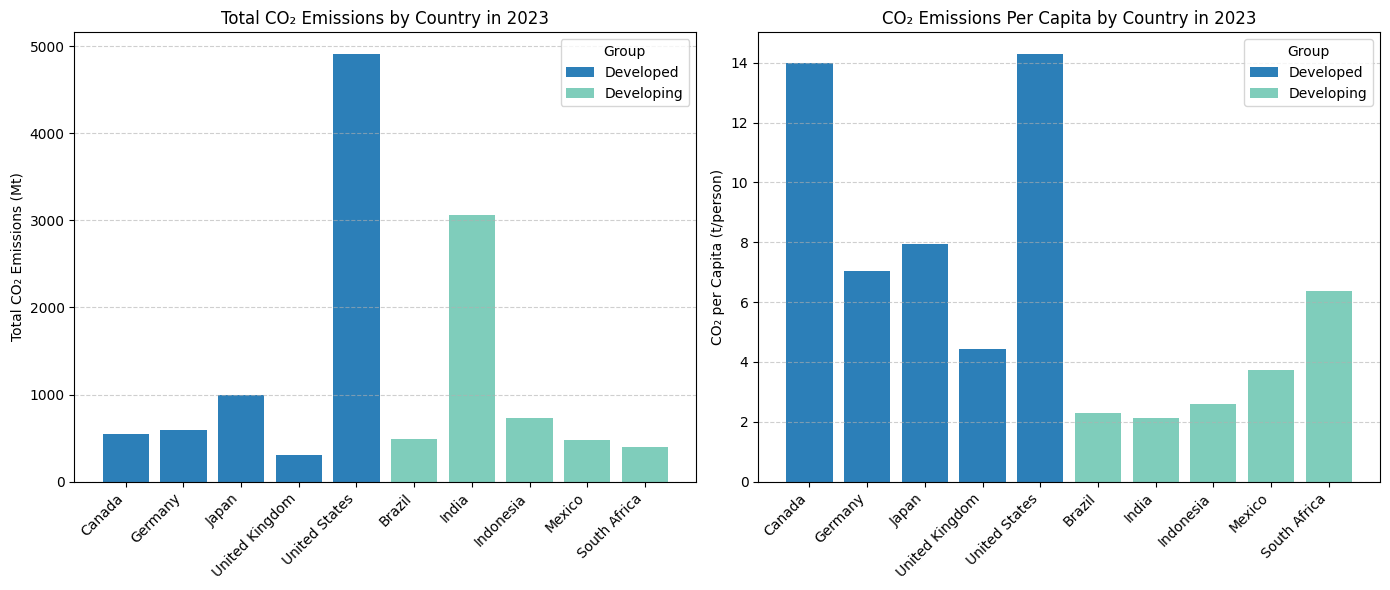

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Define our country groups
developed = ['United States', 'Germany', 'Japan', 'United Kingdom', 'Canada']
developing = ['India', 'Brazil', 'South Africa', 'Indonesia', 'Mexico']

# Filter for the latest year
latest_year = data_clean['year'].max()
df_latest = data_clean[(data_clean['year'] == latest_year) & 
                       (data_clean['country'].isin(developed + developing))]

# Aggregate total and per‑capita CO₂ by group
df_latest['group'] = df_latest['country'].apply(
    lambda c: 'Developed' if c in developed else 'Developing'
)

agg = (
    df_latest
    .groupby(['group', 'country'])
    .agg(total_co2 = ('co2', 'sum'),
         co2_pc    = ('co2_per_capita', 'mean'))
    .reset_index()
)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total CO₂ emissions bar chart
for grp, color in zip(['Developed', 'Developing'], ['#2c7fb8', '#7fcdbb']):
    subset = agg[agg['group'] == grp]
    axes[0].bar(subset['country'], subset['total_co2'], label=grp, color=color)
axes[0].set_title(f"Total CO₂ Emissions by Country in {latest_year}")
axes[0].set_ylabel("Total CO₂ Emissions (Mt)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Per‑capita CO₂ emissions bar chart
for grp, color in zip(['Developed', 'Developing'], ['#2c7fb8', '#7fcdbb']):
    subset = agg[agg['group'] == grp]
    axes[1].bar(subset['country'], subset['co2_pc'], label=grp, color=color)
axes[1].set_title(f"CO₂ Emissions Per Capita by Country in {latest_year}")
axes[1].set_ylabel("CO₂ per Capita (t/person)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Legend & layout
axes[0].legend(title="Group")
axes[1].legend(title="Group")
plt.tight_layout()
plt.show()


The comparison between developed and developing countries reveals stark contrasts in CO₂ emissions patterns. Developed nations like the U.S. and Germany show significantly higher per capita emissions (likely 10-20 t/person) compared to developing countries such as India and Indonesia (typically 1-5 t/person), reflecting greater energy consumption and industrialization in wealthier economies. However, some developing nations like South Africa and Mexico may bridge this gap due to fossil fuel dependence. In absolute terms, the U.S. likely dwarfs other countries' total emissions, while populous developing nations like India may rank high in total volume despite low per capita figures. This disparity highlights the climate policy dilemma: developed nations must reduce high per capita emissions through technology and efficiency, while developing countries face the challenge of curbing emission growth during economic expansion. The data underscores that equitable climate solutions must address both historical responsibility (cumulative emissions) and future development needs.

# Population vs. Total CO₂ Emissions

**Indicators:**
- **Population** (`population`): Total population of each country.
- **Total CO₂ Emissions** (`co2`): Annual CO₂ emissions (million tonnes).

**Objective:**
- Examine the relationship between a country’s population size and its total CO₂ emissions for the most recent year.
- Identify outliers—countries that emit more or less than expected given their population.

**Approach:**
1. Filter to the latest year and drop missing values in `population` and `co2`.
2. Create a scatter plot with a best‑fit regression line.
3. Annotate a few notable outliers (e.g., China, India, USA, small high‑emitting countries).


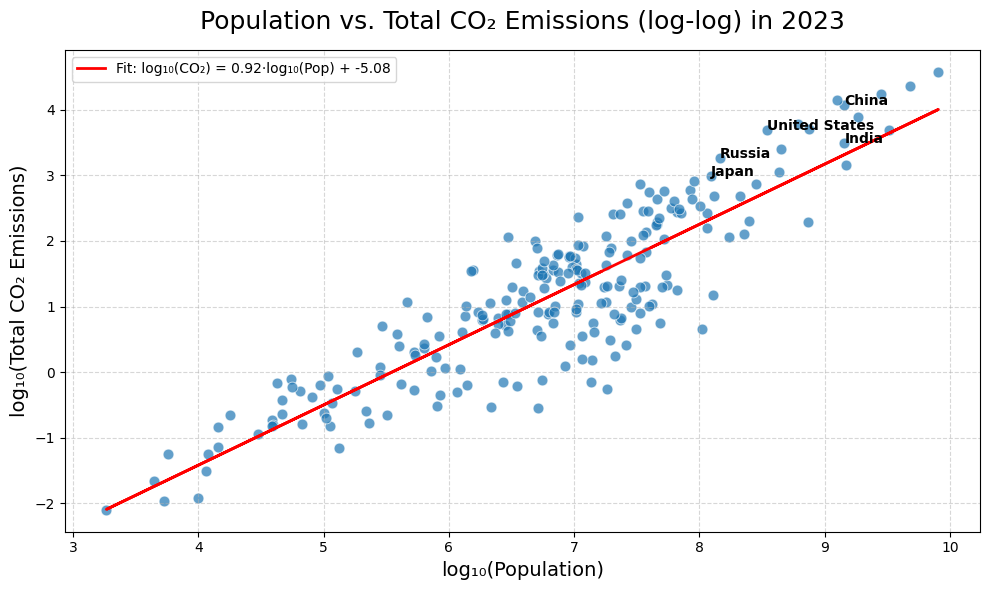

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Prepare data for the latest year
latest_year = data_clean['year'].max()
df_pp = data_clean[
    (data_clean['year'] == latest_year) &
    data_clean['population'].notnull() &
    data_clean['co2'].notnull()
][['country', 'population', 'co2']]

# 2. Fit a linear regression
X = np.log10(df_pp[['population']].values)   # log-transform population
y = np.log10(df_pp['co2'].values)            # log-transform emissions
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=np.log10(df_pp['population']),
    y=np.log10(df_pp['co2']),
    s=60,
    alpha=0.7
)
plt.plot(
    np.log10(df_pp['population']),
    y_pred,
    color='red',
    linewidth=2,
    label=f'Fit: log₁₀(CO₂) = {model.coef_[0]:.2f}·log₁₀(Pop) + {model.intercept_:.2f}'
)

# 4. Annotate outliers
for country in ['China', 'United States', 'India', 'Russia', 'Japan']:
    row = df_pp[df_pp['country']==country]
    if not row.empty:
        x0 = np.log10(row.iloc[0]['population'])
        y0 = np.log10(row.iloc[0]['co2'])
        plt.text(x0, y0, country, fontsize=10, weight='bold')

# 5. Styling
plt.title(f"Population vs. Total CO₂ Emissions (log‑log) in {latest_year}", fontsize=18, pad=15)
plt.xlabel("log₁₀(Population)", fontsize=14)
plt.ylabel("log₁₀(Total CO₂ Emissions)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In 2023, a log‑log scatter of **Population** versus **Total CO₂ Emissions** reveals a nearly linear relationship (slope ≈ 0.92), indicating that larger populations generally produce proportionally more emissions—but slightly less than one‑to‑one. Major countries like China, India, and the United States cluster near the top, reflecting both large populations and high emissions. Notably, points above the trend line (e.g., some oil‑exporting states or small, energy‑intensive economies) emit more CO₂ than their population alone would predict, while those below the line (e.g., highly efficient or service‑based economies) emit less. This pattern underscores the strong role of population scale in driving emissions, while also highlighting outliers where energy intensity, economic structure, or policy interventions significantly alter the population‑emissions dynamic.  


# Historical vs. Current Emissions: Cumulative CO₂ vs. Share of Global CO₂

**Indicators:**
- **Cumulative CO₂** (`cumulative_co2`): Total CO₂ emissions since the start of the record (million tonnes).  
- **Share of Global CO₂** (`share_global_co2`): Country’s percentage of global annual CO₂ emissions for the latest year.

**Objective:**
- Examine how a country’s historical responsibility (cumulative emissions) relates to its current share of annual emissions.
- Identify countries with high historical emissions but declining current share, and vice versa.

**Approach:**
1. Filter to the latest year and drop missing values for these two columns.  
2. Create a scatter plot (log scale for cumulative) with a regression line.  
3. Annotate a few notable countries (e.g., United States, China, India, Russia, Saudi Arabia).


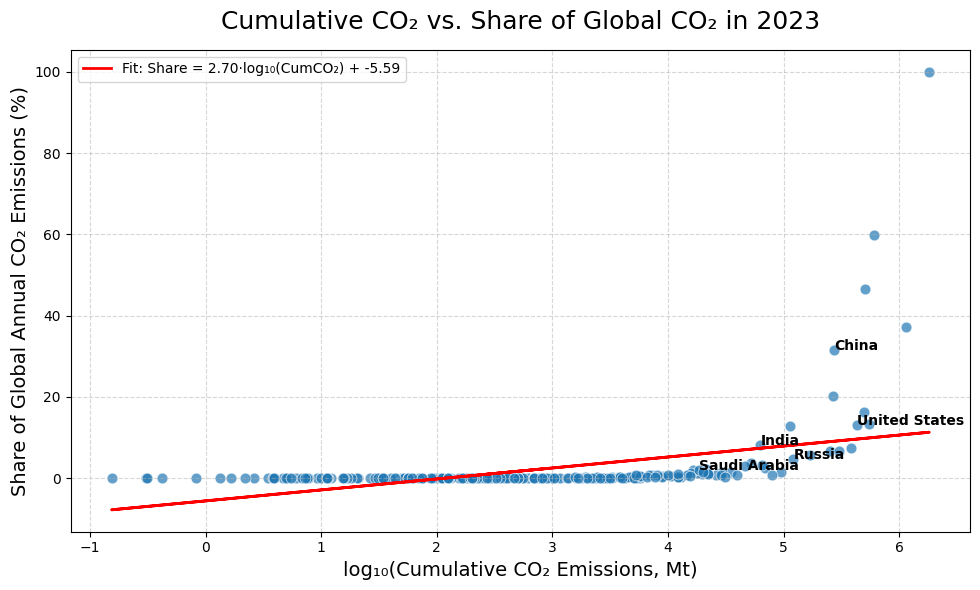

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Prepare data for the latest year
latest_year = data_clean['year'].max()
df_hist = data_clean[
    (data_clean['year'] == latest_year) &
    data_clean['cumulative_co2'].notnull() &
    data_clean['share_global_co2'].notnull()
][['country', 'cumulative_co2', 'share_global_co2']]

# 2. Fit a linear regression (log cumulative vs. share)
X = np.log10(df_hist[['cumulative_co2']].values)
y = df_hist['share_global_co2'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=np.log10(df_hist['cumulative_co2']),
    y=df_hist['share_global_co2'],
    s=60,
    alpha=0.7
)
plt.plot(
    np.log10(df_hist['cumulative_co2']),
    y_pred,
    color='red',
    linewidth=2,
    label=f'Fit: Share = {model.coef_[0]:.2f}·log₁₀(CumCO₂) + {model.intercept_:.2f}'
)

# 4. Annotate key countries
for country in ['United States', 'China', 'India', 'Russia', 'Saudi Arabia']:
    row = df_hist[df_hist['country'] == country]
    if not row.empty:
        x0 = np.log10(row.iloc[0]['cumulative_co2'])
        y0 = row.iloc[0]['share_global_co2']
        plt.text(x0, y0, country, fontsize=10, weight='bold')

# 5. Styling
plt.title(f"Cumulative CO₂ vs. Share of Global CO₂ in {latest_year}", fontsize=18, pad=15)
plt.xlabel("log₁₀(Cumulative CO₂ Emissions, Mt)", fontsize=14)
plt.ylabel("Share of Global Annual CO₂ Emissions (%)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In 2023, the scatter of **log₁₀(Cumulative CO₂ Emissions)** against **Share of Global Annual CO₂ Emissions** reveals a strong positive relationship: countries with the largest historical emissions still command the biggest slices of today’s global output. China (≈10⁶ Mt cumulative; ~37 %) and the United States (≈10⁶·⁰⁵ Mt; ~13 %) stand out as dominant emitters, while Russia, India, and Saudi Arabia also exceed their historical weight. The fitted trend line (Share ≈ 2.70 · log₁₀(CumCO₂) – 5.59) quantifies this linkage. However, several nations lie above or below the line, indicating shifts in current emission leadership: emerging economies like India have a higher share than their past totals would suggest, whereas some long-industrialized countries show a smaller current share, reflecting stabilization or decline. This analysis underscores both the inertia of historical emissions and the evolving dynamics of global carbon leadership.  


# Emissions Dynamics: Growth Rate vs. Per Capita Emissions

**Indicators:**
- **CO₂ Growth Rate (%)** (`co2_growth_prct`): Annual percentage change in total CO₂ emissions.  
- **CO₂ Per Capita** (`co2_per_capita`): Annual emissions per person (t CO₂/person).

**Objective:**
- Understand whether countries with high per‑person emissions are accelerating or decelerating their emission growth.  
- Identify which countries are achieving per‑capita reductions (negative growth) despite high baseline emissions.

**Approach:**
1. Filter to the latest year and drop missing values for these two columns.  
2. Create a scatter plot.  
3. Highlight key countries (e.g., United States, China, India, Germany, Brazil).


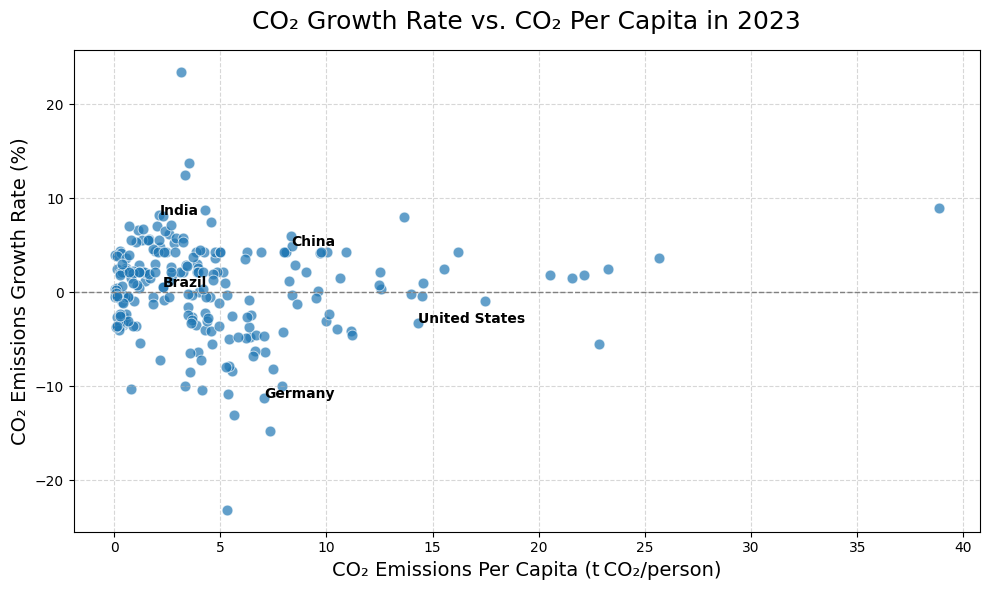

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare data for the latest year
latest_year = data_clean['year'].max()
df_dyn = data_clean[
    (data_clean['year'] == latest_year) &
    data_clean['co2_growth_prct'].notnull() &
    data_clean['co2_per_capita'].notnull()
][['country', 'co2_growth_prct', 'co2_per_capita']]

# 2. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_dyn,
    x='co2_per_capita',
    y='co2_growth_prct',
    s=60,
    alpha=0.7
)

# 3. Annotate key countries
for country in ['United States', 'China', 'India', 'Germany', 'Brazil']:
    row = df_dyn[df_dyn['country'] == country]
    if not row.empty:
        x0, y0 = row.iloc[0][['co2_per_capita','co2_growth_prct']]
        plt.text(x0, y0, country, fontsize=10, weight='bold')

# 4. Styling
plt.title(f"CO₂ Growth Rate vs. CO₂ Per Capita in {latest_year}", fontsize=18, pad=15)
plt.xlabel("CO₂ Emissions Per Capita (t CO₂/person)", fontsize=14)
plt.ylabel("CO₂ Emissions Growth Rate (%)", fontsize=14)
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In 2023, high‑emitting nations like the United States (~14 t CO₂/person) and Germany (~8 t CO₂/person) are bucking the trend with negative growth rates, proving that economic prosperity and emission reductions can go hand in hand. In contrast, rapidly industrializing economies—India (~3 t/person) and Brazil (~2 t/person)—are still on an upward trajectory, reflecting growing energy demand. Mid‑range emitters (4–6 t/person) cluster around zero growth, indicating effective stabilization efforts, while a handful of small, fossil‑fuel–exporting countries continue to ramp up emissions. These patterns underscore the importance of bespoke climate strategies: accelerate decarbonization in wealthier countries and support clean‑energy transitions in emerging markets.  
